# Anomaly Detection

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

In [1]:
# from __future__ import division
import itertools

# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")

# Standard Imports
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt
import os
from scipy.stats import spearmanr
from sklearn import metrics
from random import randint

# Vis Imports
import seaborn as sns
import matplotlib.pyplot as plt

# Custom Module Imports
import env
import wrangle

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

## Acquire and Prepare

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

In [2]:
# Acquiring the data from the codeup database via SQL query.
df = wrangle.acquire()

In [3]:
# Wrangling the data for exploration. Dropping columns, filling nulls,
# creating new columns, and setting datetimes
df = wrangle.wrangle(df)

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

In [4]:
# Create 2 dataframes that group by the cohort_id and path.
# max_page_by_cohort is a dataframe that has the max page per cohort
page_by_cohort, max_page_by_cohort = wrangle.q1(df)

In [5]:
# create an empty dataframe
max_page_by_cohort_df = pd.DataFrame()
# loop through the cohort id
for x in max_page_by_cohort.index:
#     see where the values match for the two dataframes
    df1 = page_by_cohort.loc[x][page_by_cohort.loc[x]['path_value_count'] == (max_page_by_cohort.loc[x]['path_value_count'])]
#     recreate a column for cohort id
    df1['cohort_id'] = x
#     concat the two dataframe together
    max_page_by_cohort_df = pd.concat([max_page_by_cohort_df, df1])
# see the results
max_page_by_cohort_df

,path,path_value_count,cohort_id
cohort_id,,,
0.0,search/search_index.json,1985,0.0
1.0,javascript-i,294,1.0
2.0,content/php_ii/command-line,6,2.0
4.0,mkdocs/search_index.json,1,4.0
4.0,prework/databases,1,4.0
4.0,prework/versioning/github,1,4.0
6.0,javascript-ii/es6,10,6.0
7.0,content/html-css,29,7.0
8.0,java-iii,57,8.0


In [6]:
# Do a value count on max_page_by_cohort_df
max_page_by_cohort_df['path'].value_counts().head()

toc                         10
javascript-i                 9
search/search_index.json     6
content/html-css             3
spring                       3
Name: path, dtype: int64

## Lets explore some of these findings

### Cohort 137 is Florence and their most viewed path is a .jpg?

In [7]:
# Pull the cohort with the id 137.0
df[df['cohort_id'] == 137.0].head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,root_path,root_path_2
847096,2021-03-15,15:24:05,fundamentals/intro-to-data-science,898,137.0,208.84.155.68,137.0,Florence,2021-03-15,2021-09-03,3.0,fundamentals,fundamentals/intro-to-data-science
847097,2021-03-15,15:24:05,fundamentals/modern-data-scientist.jpg,898,137.0,208.84.155.68,137.0,Florence,2021-03-15,2021-09-03,3.0,fundamentals,fundamentals/modern-data-scientist.jpg
847098,2021-03-15,15:24:05,fundamentals/AI-ML-DL-timeline.jpg,898,137.0,208.84.155.68,137.0,Florence,2021-03-15,2021-09-03,3.0,fundamentals,fundamentals/AI-ML-DL-timeline.jpg
847099,2021-03-15,15:24:07,sql/mysql-overview,898,137.0,208.84.155.68,137.0,Florence,2021-03-15,2021-09-03,3.0,sql,sql/mysql-overview
847100,2021-03-15,15:24:08,classification/overview,898,137.0,208.84.155.68,137.0,Florence,2021-03-15,2021-09-03,3.0,classification,classification/overview


### A lot of cohorts seem to have 'toc' as their most visited path.
### What is toc?

In [8]:
# Pull the paths that equal toc
df[df['path'] == 'toc'].head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,root_path,root_path_2
85409,2018-07-13,09:13:05,toc,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0,NaN,NaN
85413,2018-07-13,09:13:52,toc,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0,NaN,NaN
85686,2018-07-13,14:53:38,toc,134,23.0,97.105.19.61,23.0,Ulysses,2018-03-05,2018-07-19,2.0,NaN,NaN
85722,2018-07-13,15:57:29,toc,203,24.0,97.105.19.61,24.0,Voyageurs,2018-05-29,2018-10-11,2.0,NaN,NaN
85746,2018-07-13,17:35:58,toc,1,8.0,72.177.226.58,8.0,Hampton,2015-09-22,2016-02-06,1.0,NaN,NaN


## Answer
### Which lesson appears to attract the most traffic consistently across cohorts (per program)?
### From what I can tell it apears the lesson javascript-i  has the most traffic consistently across cohorts. However toc is the most viewed page across cohorts.

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

In [9]:
# Creates a dataframe of the min page visited grouped by cohort_id
min_page_by_cohort = page_by_cohort.groupby('cohort_id').min()

In [10]:
# create an empty dataframe
min_page_by_cohort_df = pd.DataFrame()
# loop through the cohort id
for x in min_page_by_cohort.index:
#     see where the values match for the two dataframes
    df2 = page_by_cohort.loc[x][page_by_cohort.loc[x]['path_value_count'] == (min_page_by_cohort.loc[x]['path_value_count'])]
#     recreate a column for cohort id
    df2['cohort_id'] = x
#     concat the two dataframe together
    min_page_by_cohort_df = pd.concat([min_page_by_cohort_df, df2])
# see the results
min_page_by_cohort_df

,path,path_value_count,cohort_id
cohort_id,,,
0.0,1-fundamentals/2.1-excel-overview,1,0.0
0.0,1-fundamentals/2.1-intro-to-excel,1,0.0
0.0,1-fundamentals/3-vocabulary,1,0.0
0.0,10-anomaly-detection/5-detecting-with-clustering,1,0.0
0.0,10-anomaly-detection/exercises,1,0.0
...,...,...,...
139.0,java-iii/servlets,1,139.0
139.0,javascript-i/bom-and-dom/dom,1,139.0
139.0,javascript-i/objects,1,139.0


### Lets see if any cohorts have a most visited path that is another cohorts least visited path

In [11]:
# pull the top 5 most visited pages by cohort
max_page_by_cohort_df.path.value_counts().head()

toc                         10
javascript-i                 9
search/search_index.json     6
content/html-css             3
spring                       3
Name: path, dtype: int64

In [12]:
# pull the top 5 least visited pages by cohort
min_page_by_cohort_df.path.value_counts().head()

examples/postwork/reports.yml                                     9
content/php_iii/classes-and-objects-i                             9
content/javascript_ii/gitbook/images/favicon.ico                  9
content/php_ii/control-structures-i/gitbook/images/favicon.ico    8
appendix/git/merge-conflict-demo                                  8
Name: path, dtype: int64

In [13]:
# pull the paths that equal toc from the min_page_by_cohort_df
min_page_by_cohort_df[min_page_by_cohort_df.path == 'toc']

,path,path_value_count,cohort_id
cohort_id,,,
15.0,toc,1,15.0


In [14]:
# pull the paths that equal javascript-i from the min_page_by_cohort_df
min_page_by_cohort_df[min_page_by_cohort_df.path == 'javascript-i']

,path,path_value_count,cohort_id
cohort_id,,,
2.0,javascript-i,1,2.0
12.0,javascript-i,1,12.0


In [15]:
# pull the paths that equal search/search_index.json from the min_page_by_cohort_df
min_page_by_cohort_df[min_page_by_cohort_df.path == 'search/search_index.json']

,path,path_value_count,cohort_id
cohort_id,,,
11.0,search/search_index.json,1,11.0
15.0,search/search_index.json,1,15.0


In [16]:
# pull the paths that equal content/html-css from the min_page_by_cohort_df
min_page_by_cohort_df[min_page_by_cohort_df.path == 'content/html-css']

,path,path_value_count,cohort_id
cohort_id,,,
2.0,content/html-css,1,2.0
8.0,content/html-css,1,8.0
26.0,content/html-css,1,26.0


In [17]:
# pull the paths that equal spring from the min_page_by_cohort_df
min_page_by_cohort_df[min_page_by_cohort_df.path == 'spring']

,path,path_value_count,cohort_id
cohort_id,,,
55.0,spring,1,55.0


### Cohort 15 aperars quite often and cohort 2 apears twice as well.

## Answer
### Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
### In the top 5 most visited lessons cohorts 15 and 2 have several each that is their least visited lesson.

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

## 3. Which lessons are least accessed?

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

In [18]:
# This function returns a dataframe that takes the value count of the 
# root_path_2 from a dataframe without staff included.
least_lessons_without_staff = wrangle.q3(df)

In [19]:
# Looks at the root path 2 value count where it is greater then 25
least_lessons_without_staff[least_lessons_without_staff['root_path_2'] > 25].head(10)


,root_path_2
advanced-topics/developing-data-products,27
4-python/pandas-time-series,27
appendix/git-teamwork,27
8_Exercises/ds.codeup.com,28
10-anomaly-detection/2-continuous-probabilistic-methods.ipynb.md,28
advanced-topics/building-a-model,28
content/gitbook,28
python/project,28
6-regression/project,29
python/pandas-lesson,29


## Answer
### Which lessons are least accessed?
### A majority of the least accessed lessons appear to have been test lessons, or were changed shortly after creation. The pandas lesson in the data science cohorts apear to be the most consistent least accessed lesson.

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

## 4. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

In [20]:
# This function returns 2 dataframes that contain the most accessed 
# lessons after graudation by program.
page_by_program, max_page_by_program = wrangle.q4(df)

In [21]:
# create an empty dataframe
max_page_by_program_df = pd.DataFrame()

# loop through the cohort id
for x in max_page_by_program.index:
#     see where the values match for the two dataframes
    df3 = page_by_program.loc[x][page_by_program.loc[x]['path_value_count'] == (max_page_by_program.loc[x]['path_value_count'])]
#     concat the two dataframe together
    max_page_by_program_df = pd.concat([max_page_by_program, df3])
# see the results
max_page_by_program_df

,path,path_value_count
program_id,,
1.0,web-design/ux/purpose,1011
2.0,wp-login,4229
3.0,viz.py,493
4.0,content/html-css/introduction.html,2
4.0,content/html-css,2


## Answer
### What topics are grads continuing to reference after graduation and into their jobs (for each program)?
### The 5 most referenced topics after graduation are web-design, wp-login, a vis.py file, and html-css.

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

## 5. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

In [22]:
# This function returns a dataframe that groups by user id and root path.
page_by_student, active_df = wrangle.q5(df)

In [23]:
# get the 3 users that accessed the content the least
page_by_student.nsmallest(n=3, columns='root_path_value_count')

,root_path_value_count
user_id,
572,1
539,2
278,3


In [24]:
active_df[active_df['user_id'] == 832]

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,root_path,root_path_2
754204,2020-12-07,14:22:38,javascript-i,832,62.0,69.154.52.98,62.0,Jupiter,2020-09-21,2021-03-30,2.0,NaN,NaN
754206,2020-12-07,14:22:39,html-css,832,62.0,69.154.52.98,62.0,Jupiter,2020-09-21,2021-03-30,2.0,NaN,NaN


In [25]:
active_df[active_df['user_id'] == 278]

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,root_path,root_path_2
131788,2018-09-27,14:47:37,java-ii/arrays,278,24.0,107.77.217.9,24.0,Voyageurs,2018-05-29,2018-10-11,2.0,java-ii,java-ii/arrays
131802,2018-09-27,14:58:48,java-ii/arrays,278,24.0,107.77.217.9,24.0,Voyageurs,2018-05-29,2018-10-11,2.0,java-ii,java-ii/arrays
131804,2018-09-27,14:59:07,java-ii/collections,278,24.0,107.77.217.9,24.0,Voyageurs,2018-05-29,2018-10-11,2.0,java-ii,java-ii/collections


In [26]:
active_df[active_df['user_id'] == 539]

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,root_path,root_path_2
388309,2019-11-04,16:19:34,toc,539,52.0,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0,NaN,NaN
388399,2019-11-04,16:54:02,html-css,539,52.0,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0,NaN,NaN
388405,2019-11-04,16:54:38,html-css/introduction,539,52.0,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0,html-css,html-css/introduction
388407,2019-11-04,16:54:45,html-css/elements,539,52.0,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0,html-css,html-css/elements


In [27]:
df[df['user_id'] == 539]

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,root_path,root_path_2
388309,2019-11-04,16:19:34,toc,539,52.0,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0,NaN,NaN
388399,2019-11-04,16:54:02,html-css,539,52.0,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0,NaN,NaN
388405,2019-11-04,16:54:38,html-css/introduction,539,52.0,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0,html-css,html-css/introduction
388407,2019-11-04,16:54:45,html-css/elements,539,52.0,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0,html-css,html-css/elements
388963,2019-11-05,11:04:37,spring,539,28.0,97.105.19.58,28.0,Staff,2014-02-04,2014-02-04,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
851207,2021-03-17,12:07:51,toc,539,28.0,70.123.228.62,28.0,Staff,2014-02-04,2014-02-04,2.0,NaN,NaN
851208,2021-03-17,12:08:25,html-css/css-i,539,28.0,70.123.228.62,28.0,Staff,2014-02-04,2014-02-04,2.0,html-css,html-css/css-i
851209,2021-03-17,12:08:31,html-css/forms,539,28.0,70.123.228.62,28.0,Staff,2014-02-04,2014-02-04,2.0,html-css,html-css/forms
851211,2021-03-17,12:08:43,html-css,539,28.0,70.123.228.62,28.0,Staff,2014-02-04,2014-02-04,2.0,NaN,NaN


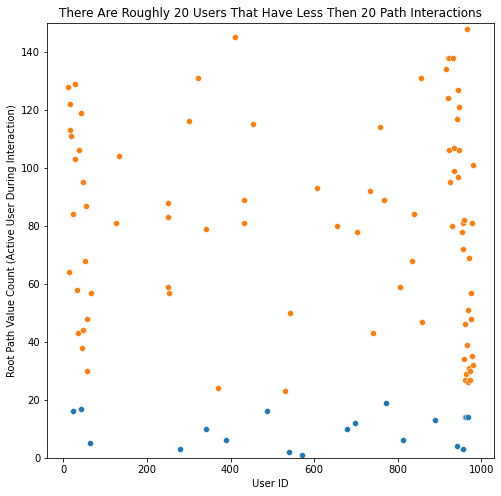

In [28]:
wrangle.vis5(page_by_student)


## Answer
### Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
### Yes, I took at the 3 students that accessed the curriculum the least. Their id's are 572, 539, and 278. Upon closer inspection 539 appears to be a staff user id.

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

## Conclusions

<hr style="border-top:10px groove LawnGreen; margin-top: 2px; margin-bottom: 2px">

- Javascript-i has the most traffic consistently across cohorts. However toc is the most viewed page across cohorts.
- In the top 5 most visited lessons cohorts 15 and 2 have several occurrences each that is their least visited lesson.
- A majority of the least accessed lessons appear to have been test lessons, or were changed shortly after creation. The pandas lesson in the data science cohorts apear to be the most consistent least accessed lesson.
- The 5 most referenced topics after graduation are web-design, wp-login, a vis.py file, and html-css.
- The 3 students id's that accessed the curriculum the least are 572, 539, and 278. Upon closer inspection 539 appears to be a staff user id.